<a href="https://colab.research.google.com/github/Sharon-Faith/housing-prices/blob/main/housing_prices_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

### a) Specifying the Question

The purpose of the study is to investigate factors that affect housing prices using the information provided in [this dataset](http://bit.ly/IndependentProjectWeek7Dataset) and to create a model that will enable Hass Consulting Company to accurately predict the sale price of a house.

### b) Defining the Metric for Success

* Determining and visualising the descriptive statistics of each of the variables in the dataset.
* Determining and visualising the relationships between the sale price and the predictor variables provided.
* Creating a model that will enable the prediction of the sale price of a house.


### c) Understanding the context 

Real estate refers to property consisting of land and the buildings, structures and natural resources associated with it. In this study, the focus is on houses. The aspect of interest is the sale price of a house. There are numerous factors that may influence the sale price, and analysing and understanding the impact of some of these different factors will help property developers, home owners interested in selling, and buyers alike make informed decisions depending on their primary objectives and priorities.

### d) Recording the Experimental Design

*   Determine the main objectives
*   Load and preview the dataset.
*   Understand the data.
*   Prepare the dataset - Identify outliers, anomalies, duplicates, missing values, and determine how deal with them, drop unnecessary columns etc.
*    Analyse the dataset using univariate, bivariate and multivariate analysis techniques.
*   Implement the solution through modelling.
*   Challenge the solution.
*   Conclusion and recommendations

### e) Data Relevance

The dataset provided ([here](http://bit.ly/IndependentProjectWeek7Dataset)) is relevant to the research question. It has the prices of houses as well as various characteristics of those houses, and that is the information needed to achieve the objectives.

## Reading the Data

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [ ]:
# Loading the Dataset
# 
df = pd.read_csv('house_data.csv')

## Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
df.shape

(21613, 20)

In [ ]:
# Previewing the top of our dataset
#
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Previewing the bottom of our dataset
# 
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking datatype of each column
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
# column definitions from kaggle for this dataset

# id - Unique ID for each home sold
# price - Price of each home sold
# bedrooms - Number of bedrooms
# bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
# sqft_living - Square footage of the interior living space
# sqft_lot - Square footage of the land space
# floors - Number of floors
# waterfront - A binary variable for whether the house was overlooking the waterfront or not
# view - An index from 0 to 4 of how good the view of the property was
# condition - An index from 1 to 5 on the condition of the apartment,
# grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
# sqft_above - The square footage of the interior housing space that is above ground level
# sqft_basement - The square footage of the interior housing space that is below ground level
# yr_built - The year the house was initially built
# yr_renovated - The year of the house’s last renovation
# zipcode - What zipcode area the house is in
# lat - Latitude
# long - Longitude
# sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [ ]:
#continuous
#price
#sqft_living
#sqft_lot
#sqft_above
#sqft_basement
# lat - Latitude
# long - Longitude
# sqft_living15 
# sqft_lot15 
#yr_built
#yr_renovated
contin = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 
          'sqft_lot15', 'yr_built', 'yr_renovated']

In [ ]:
#columns that are categorical/discrete in nature as per definitions:
#categorical/discrete
#waterfront 
#zipcode 
#condition 
#grades 
#bedrooms
#bathrooms
#floors
#view
cat_disc = ['waterfront', 'zipcode', 'condition', 'grade', 'bedrooms', 'bathrooms', 'floors', 'view']

In [ ]:
#list with numerical data - continuous or discrete
contin_discr = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
          'sqft_lot15', 'yr_built', 'yr_renovated', 'floors']

In [ ]:
#list of columns representing info that is categorical in nature
cat_only = ['waterfront', 'zipcode', 'condition', 'grade', 'view']

## Tidying the Dataset

In [ ]:
# dropping unnecessary columns
df.drop(columns = ['id'], inplace=True)

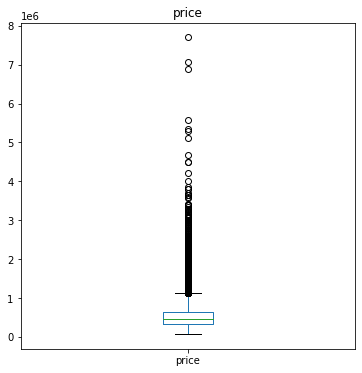

****************************************************


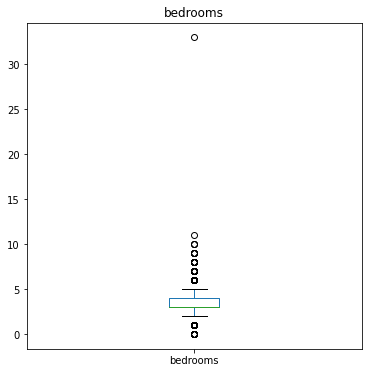

****************************************************


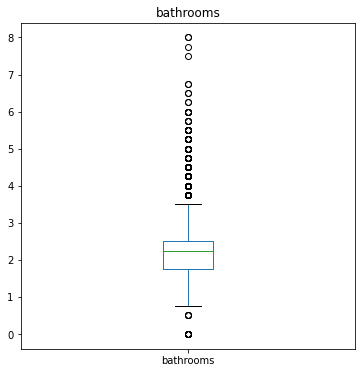

****************************************************


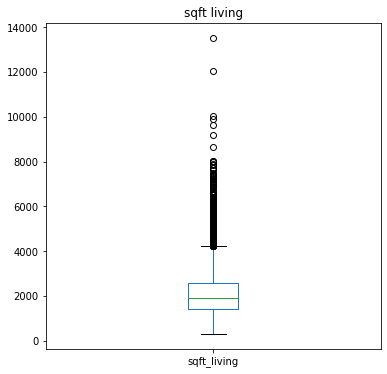

****************************************************


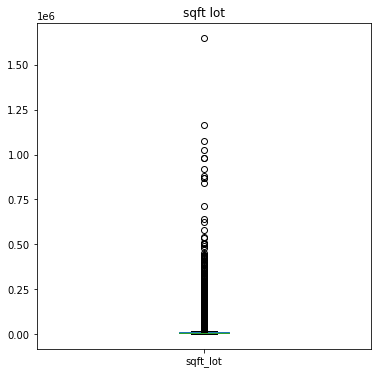

****************************************************


In [ ]:
# Checking for outliers and anomalies
#for originally numerical data, plotting 5 boxplots at a time

def title(col):
  if '_' in col:
    return col.replace('_', ' ')
  else:
    return col
for col in contin_discr[0:5]:
  df.boxplot(col, grid=False)
  plt.title(title(col))
  plt.gcf().set_size_inches(6,6)
  plt.show()
  print('****************************************************')

There are outliers in price, bedrooms, bathrooms, sqft_living (square footage of the interior living space), and sqft_lot (square footage of the land space).

* House prices vary, with some being very expensive depending on various factors so outliers are expected and will not be dropped.

* The maximum outliers in the number of bathrooms fall within a reasonable range for large houses so they will not be dropped.

* The outliers in the square footage of interior living space fall within the range of values that are probable for large houses so they will not be dropped.

* The outliers in the square footage of land space fall within the range values that are probable for home owners who own a lot of land so they will not be dropped.

* Houses that are mansions would be expected to have more bedrooms than usual so most wont outliers be dropped, but the outlier in the range of 30-40 is of particular interest because it is much further from other observations and will be examined further.

In [ ]:
df[df.bedrooms > 15]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


It is highly improbable -- an anomaly -- for a house with 33 bedrooms to only have 1620 square feet of living space. We will therefore drop this observation.

In [ ]:
#dropping record 15870
df.drop(index=[15870], inplace=True)

In [ ]:
#resetting the index
df = df.reset_index().drop(columns='index')

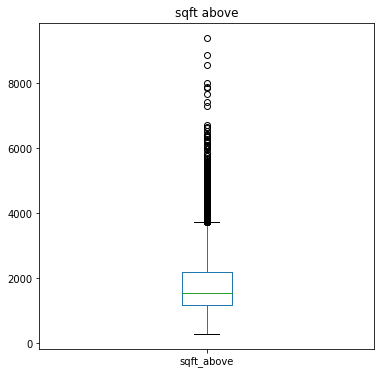

****************************************************


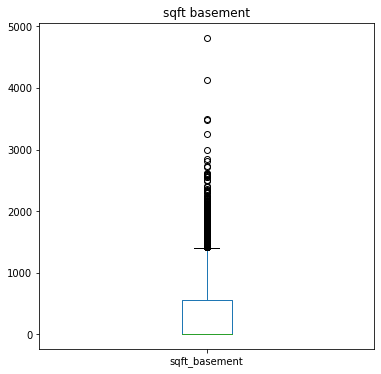

****************************************************


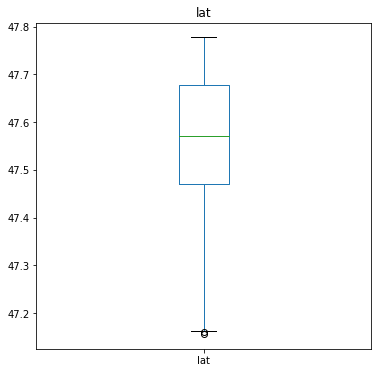

****************************************************


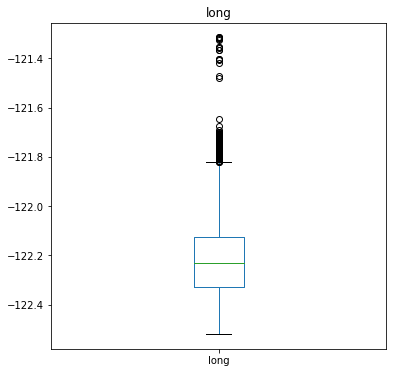

****************************************************


In [ ]:
# Checking for outliers and anomalies
#for originally numerical data

for col in contin_discr[5:9]:
  df.boxplot(col, grid=False)
  plt.title(title(col))
  plt.gcf().set_size_inches(6,6)
  plt.show()
  print('****************************************************')

 There were outliers in square footage of interior housing space above ground level, square footage of the interior housing space  below ground level, longitude, and very few outliers in latitude. The outliers in these columns will not be dropped because for the square footages, the outliers fall within the range of values that are probable for large houses, while for latitude and longitude, it is possible for some houses to be in coordinates that do not have a lot of residential homes around,



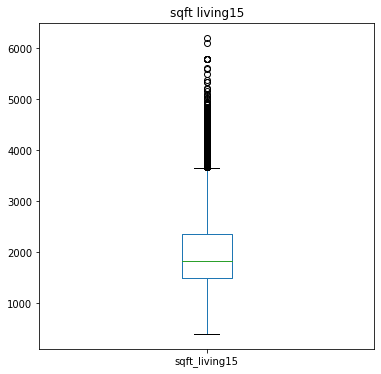

****************************************************


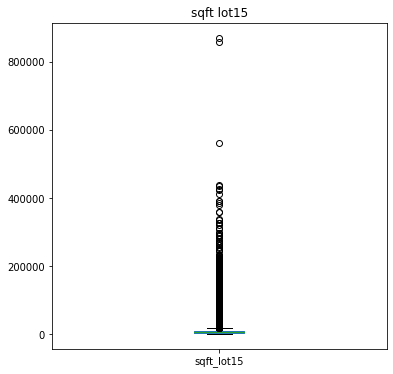

****************************************************


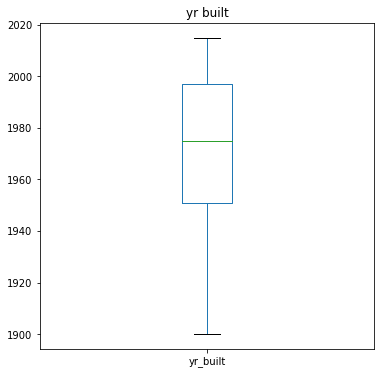

****************************************************


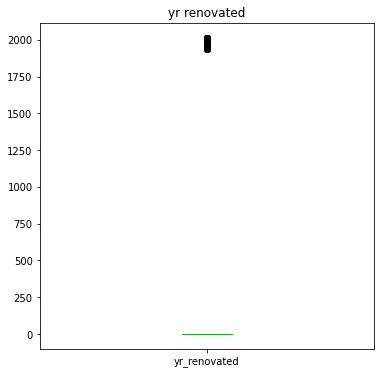

****************************************************


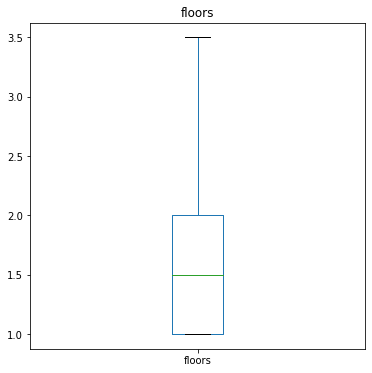

****************************************************


In [ ]:
# Checking for outliers and anomalies
#for originally numerical data

for col in contin_discr[9:14]:
  df.boxplot(col, grid=False)
  plt.title(title(col))
  plt.gcf().set_size_inches(6,6)
  plt.show()
  print('****************************************************')

* There were outliers in sqft_living15 (the square footage of interior housing living space for the nearest 15 neighbors) and sqft_lot15 (the square footage of the land lots of the nearest 15 neighbors). The outliers in these columns will not be dropped because these averages for the 15 nearest neighbours fall within the range of values that are probable for large houses, and home owners with a lot of land, respectively.

* Year renovated has that appearance of outliers around 2000 because records that were not renovated, which were the majority, were designated 0, while those that were renovated have year values from the 1900s and 2000s.

* There were no outliers in number of floors and year built. 

In [ ]:
#checking for anomalies in columns representing categorical information
for col in cat_only:
  print(f'{col}:')
  print(df[col].unique())
  print('******************************************************************')
#no anomalies identified

waterfront:
[0 1]
******************************************************************
zipcode:
[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]
******************************************************************
condition:
[3 5 4 1 2]
******************************************************************
grade:
[ 7  6  8 11  9  5 10 12  4  3 13  1]
******************************************************************
view:
[0 3 4 2 1]
******************************************************************


In [ ]:
# Identifying the Missing Data
#
df.isnull().sum()
#no missing values in any column

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.shape

(21612, 19)

In [ ]:
#Checking for duplicates
df.duplicated().sum()

5

In [ ]:
df[df.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20053,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20523,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,47.5818,-122.402,1510,1352


In [ ]:
df[(df['price'] == 259950.0) & (df['bedrooms'] == 2) & (df['bathrooms'] == 2.00) & (df['yr_built'] == 2008)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
547,259950.0,2,2.0,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
4352,259950.0,2,2.0,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928


In [ ]:
#wont drop duplicates. It is possible for different houses with identical specifications, in the same estate or apartment block
#to be sold at the same price.

## Univariate Analysis

In [ ]:
print(contin) #continuous variables
print(cat_only) #categorical
print(contin_discr) #continuous and discrete
print(cat_disc) #categorical and discrete

['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']
['waterfront', 'zipcode', 'condition', 'grade', 'view']
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'floors']
['waterfront', 'zipcode', 'condition', 'grade', 'bedrooms', 'bathrooms', 'floors', 'view']


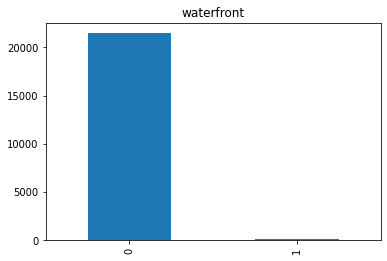

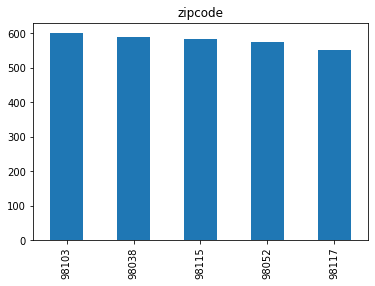

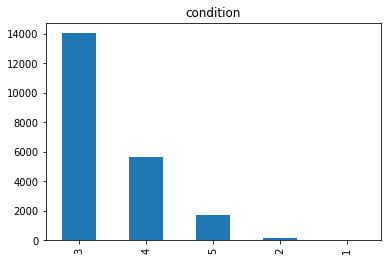

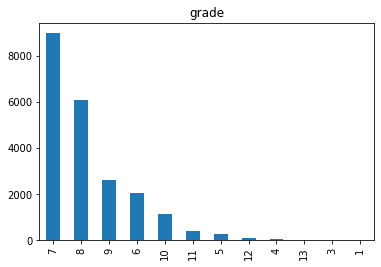

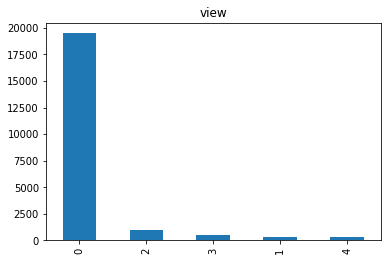

In [ ]:
# Countplots for columns representing categorical information
for col in cat_only:
  if col is not 'zipcode':
    df[col].value_counts().plot.bar(title=title(col))
    plt.show()
    print('')
  else:
    df[col].value_counts().nlargest().plot.bar(title=title(col))
    plt.show()
    print('')


* Most houses were not overlooking the waterfront.
* The top 5 most common zipcodes were 98103, 98038, 98115, 98052 and 98117.
* The most common rating of condition of the house was 3.
* The most common grade (level of construction and design) was 7, which is a more average level on the scale of 1-13.
* Most common rating of the property view was 0.


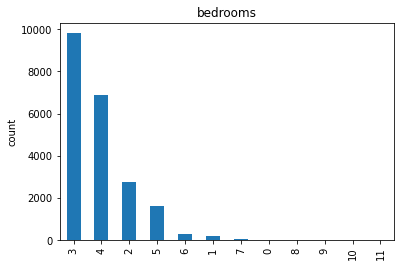

In [ ]:
#countplot bedrooms
df['bedrooms'].value_counts().plot.bar(title='bedrooms')
plt.ylabel('count')
plt.show()

Most houses had 3 bedrooms.

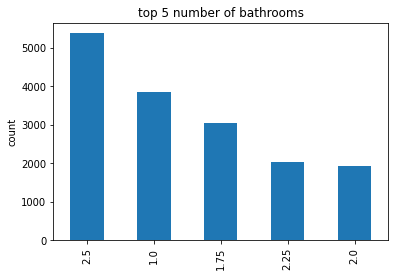

In [ ]:
#countplot bathrooms
df['bathrooms'].value_counts().nlargest().plot.bar(title='top 5 number of bathrooms')
plt.ylabel('count')
plt.show()

Most houses had two and a half baths.

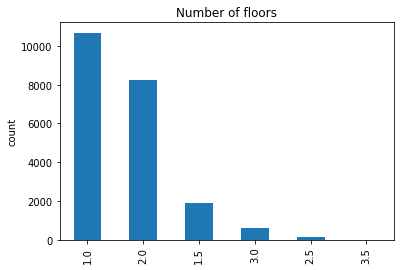

In [ ]:
#countplot of floors
df['floors'].value_counts().plot.bar(title='Number of floors')
plt.ylabel('count')
plt.show()

Most houses had 1 floor.

In [ ]:
# descriptive statistics continuous data

for col in contin[0:-2]:
  print(f'\n{col}:')
  print('')
  print(df[col].describe())
  print('**************************************')


price:

count    2.161200e+04
mean     5.401775e+05
std      3.673701e+05
min      7.500000e+04
25%      3.218375e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
**************************************

sqft_living:

count    21612.000000
mean      2079.921016
std        918.456818
min        290.000000
25%       1426.500000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
**************************************

sqft_lot:

count    2.161200e+04
mean     1.510739e+04
std      4.142142e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.619000e+03
75%      1.068825e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64
**************************************

sqft_above:

count    21612.000000
mean      1788.425319
std        828.094487
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64
***

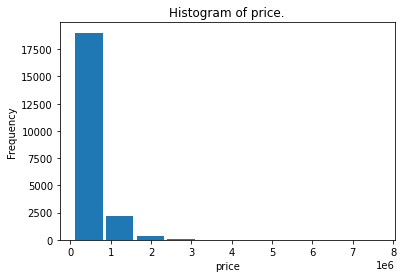

Most price values of houses fell within the range of 75000.0 to 837500.0



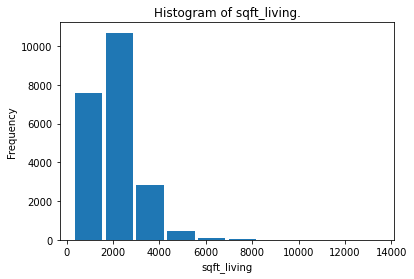

Most sqft_living values of houses fell within the range of 1615.0 to 2940.0



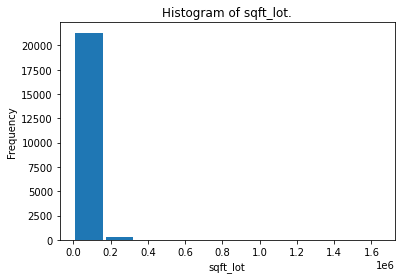

Most sqft_lot values of houses fell within the range of 520.0 to 165603.9



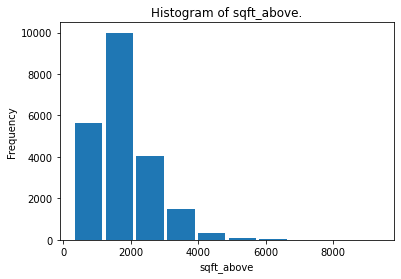

Most sqft_above values of houses fell within the range of 1202.0 to 2114.0



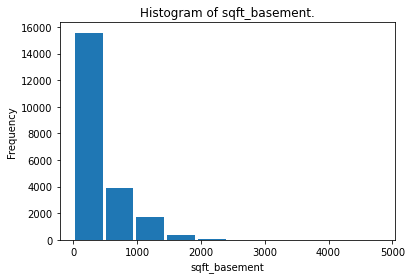

Most sqft_basement values of houses fell within the range of 0.0 to 482.0



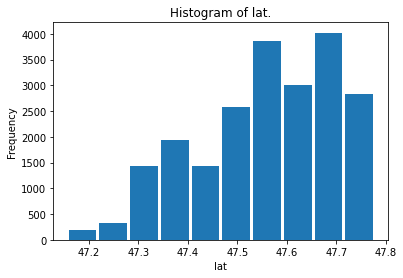

Most latitude values of houses fell within the range of 47.65326 to 47.71543



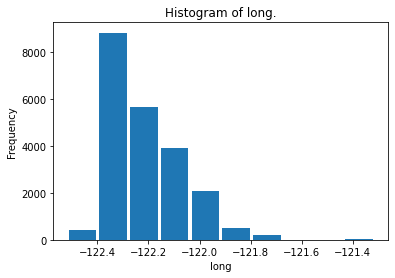

Most longitude values of houses fell within the range of -122.3986 to -122.2782



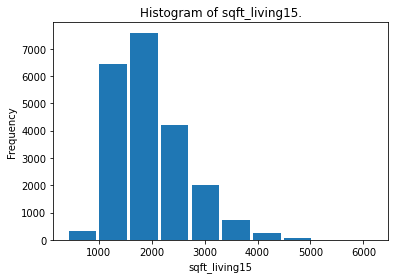

Most sqft_living15 values of houses fell within the range of 1561.2 to 2142.3



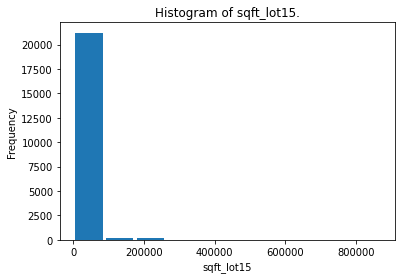

Most sqft_lot15 values of houses fell within the range of 651.0 to 87705.9



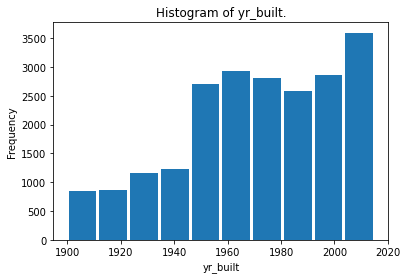

Most houses were built between 2003 and 2015



In [ ]:
#plotting histograms for continuous

for col in contin[0:-1]:
  (n, bins, patches) = plt.hist(df[col], bins= 10, rwidth=0.9)

  plt.title(f'Histogram of {col}.')
  plt.xlabel(f'{col}')
  plt.ylabel('Frequency')
  plt.show()
  #creating a dataframe with the values of bin edges
  df_hist = pd.DataFrame(data=n, columns=['bin_values'])
  df_hist['left_bin_edge'] = bins[0:-1]
  df_hist
  last = {
    'bin_values': 0,
    'left_bin_edge': bins[-1]
  }
  df_hist = df_hist.append(last, ignore_index=True)
  #looping through dataframe above to identify bins with most frequency and the respective bin edges 
  for i in df_hist.index:
    if df_hist.loc[i, 'bin_values'] == df_hist['bin_values'].max():
      left_edge =  df_hist.loc[i, 'left_bin_edge']
      right_lim = df_hist.loc[i+1, 'left_bin_edge']
      if col == 'lat':
        print(f'Most latitude values of houses fell within the range of { left_edge} to {right_lim}')
      elif col == 'long':
        print(f'Most longitude values of houses fell within the range of { left_edge} to {right_lim}')
      elif col == 'yr_built':
        print(f'Most houses were built between { int(left_edge)} and {int(right_lim)}')
      else:
        print(f'Most {col} values of houses fell within the range of { left_edge} to {right_lim}')

  print('')

In [ ]:
#column that hasnt been plotted above
contin[-1:]

['yr_renovated']

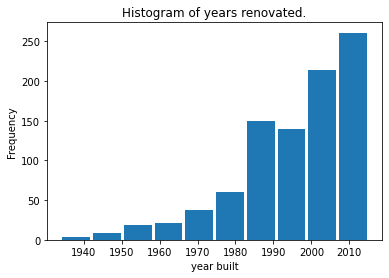

Most houses that were renovated were renovated between 2006 and 2015


In [ ]:
#filtering out year renovated = 0 so that histogram can be plotted reflecting information only on houses that were renovated
df_ren = df[df.yr_renovated != 0]

(n, bins, patches) = plt.hist(df_ren['yr_renovated'], bins= 10, rwidth=0.9)

plt.title(f'Histogram of years renovated.')
plt.xlabel(f'year built')
plt.ylabel('Frequency')
plt.show()
# creating dataframe with bin values and edges
df_hist = pd.DataFrame(data=n, columns=['bin_values'])
df_hist['left_bin_edge'] = bins[0:-1]
df_hist
last = {
    'bin_values': 0,
    'left_bin_edge': bins[-1]
  }
df_hist = df_hist.append(last, ignore_index=True)
#looping through dataframe of records where the house has been renovated above to identify bin with most frequency and the respective bin edges, 
for i in df_hist.index:
  if df_hist.loc[i, 'bin_values'] == df_hist['bin_values'].max():
    left_edge =  df_hist.loc[i, 'left_bin_edge']
    right_lim = df_hist.loc[i+1, 'left_bin_edge']
    print(f'Most houses that were renovated were renovated between { int(left_edge)} and {int(right_lim)}')

## Bivariate Analysis

In [ ]:
#target column of interest is prices

In [ ]:
#list with categorical and discrete data
cat_disc

['waterfront',
 'zipcode',
 'condition',
 'grade',
 'bedrooms',
 'bathrooms',
 'floors',
 'view']

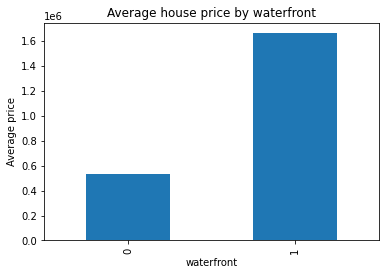

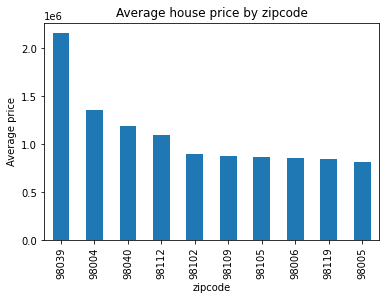

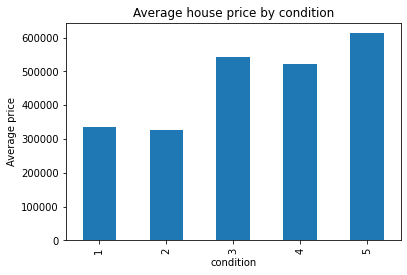

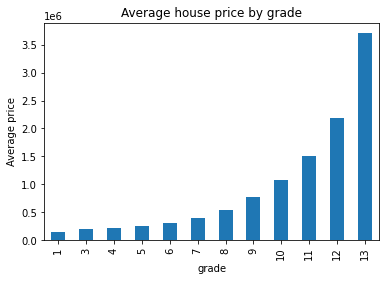

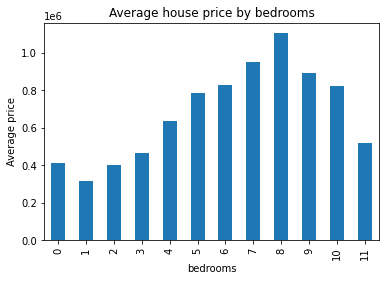

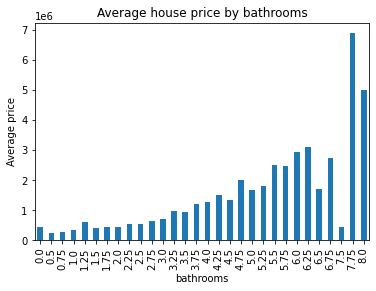

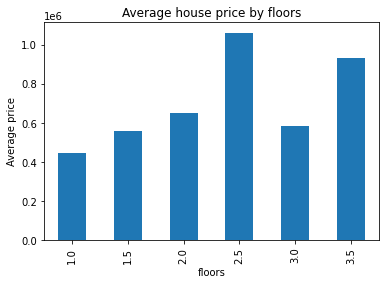

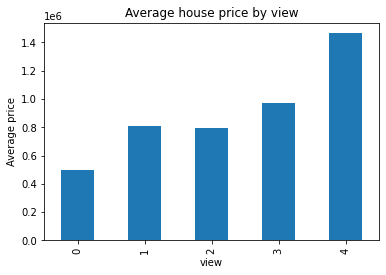

In [ ]:
#plotting how average price varies according to the different categorical and discrete variables
for col in cat_disc:
  if col != 'zipcode':
    df.groupby(col)['price'].mean().plot.bar()
  else:
    df.groupby(col)['price'].mean().nlargest(10).plot.bar()
  plt.ylabel('Average price')
  plt.title(f'Average house price by {col}')
  plt.show() 

The average price of houses was higher for:
* waterfront: Houses that overlook the waterfront
* zipcodes: Houses in zipcode 98039
* condition: Houses whose condition rating was 5
* grade: Houses whose grade of quality of construction and design at 13
* bedrooms: Houses with 8 bedrooms
* bathrooms: Houses with 7.75 baths
* floors: Houses with 2.5 baths
* view: Houses with a rating of 4 for views.


In [ ]:
# continuous 
contin

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_built',
 'yr_renovated']

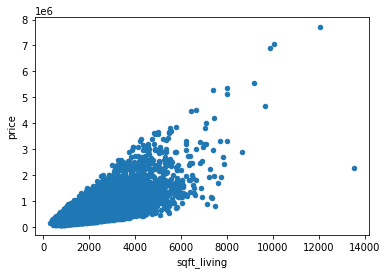

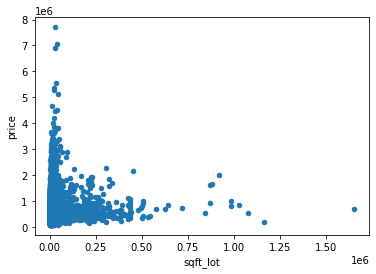

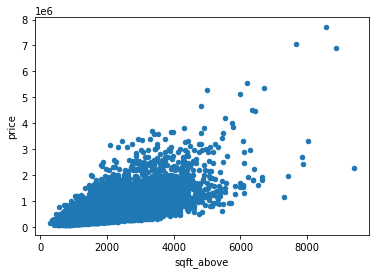

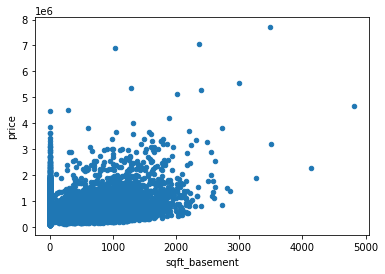

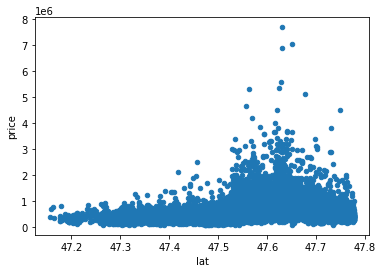

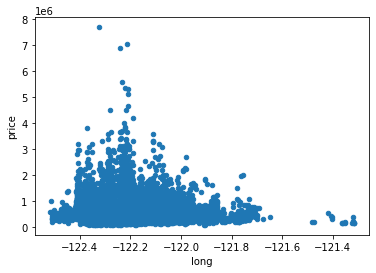

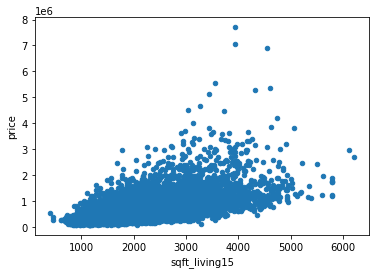

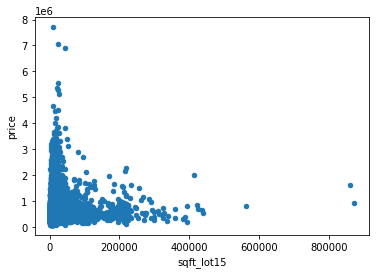

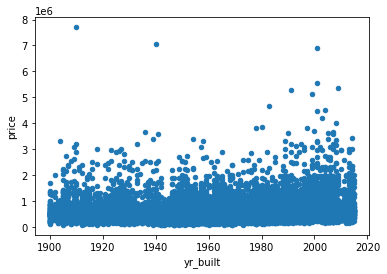

In [ ]:
for col in contin[1:-1]:
  df.plot.scatter(x=col, y='price')

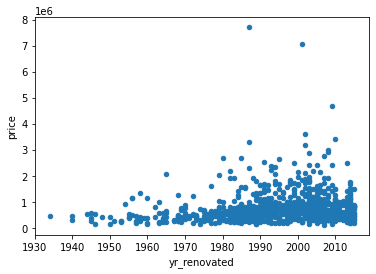

In [ ]:
#plotting how prices varied for renovated houses according to years renovated
df_ren.plot.scatter(x='yr_renovated', y='price')

From the scatterplots there appears to be a notable positive correlation between price and:
* sqft_living (square feet of interior living space).
* sqft_above (square feet of interior living space above ground).
* sqft_basement (square feet of interior living space below ground).
* sqft_living15 (square footage of interior housing living space for the nearest 15 neighbors)

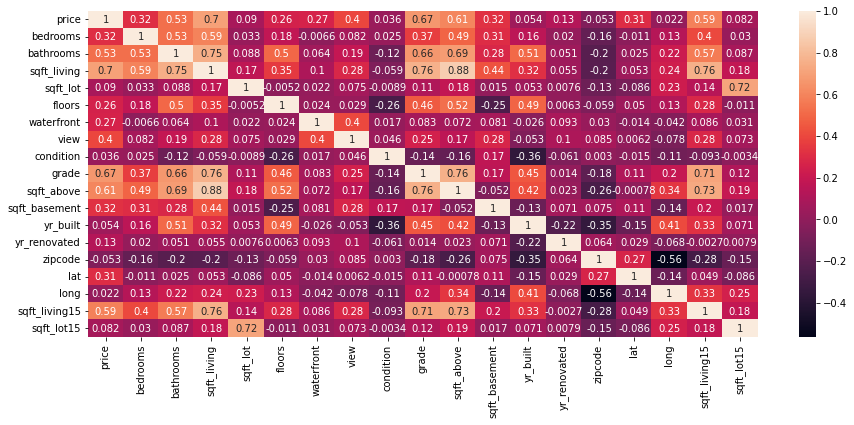

In [ ]:
#correlation heat map
sb.heatmap(df.corr(),annot=True)
plt.gcf().set_size_inches(15,6)
plt.show()

Price is the target column of interest. According to the correlation values, it has a strong positive correlation (>0.5) with sqft_living, grade, sqft_above, sqft_living15, and bathrooms, in that order.

## Multivariate Analysis and Implementing The Solution.

In [ ]:
#continuous
#price
#sqft_living
#sqft_lot
#sqft_above
#sqft_basement
# lat - Latitude
# long - Longitude
# sqft_living15 
# sqft_lot15 
#yr_built
#yr_renovated

#columns that are categorical/discrete in nature as per definitions:
#waterfront 
#zipcode 
#condition 
#grades 
#bedrooms
#bathrooms
#floors
#view

### Multicollinearity check using VIF

One of the assumptions of linear regression is little or no multicollinearity so checking for the presence of this phenomenon is important.

In [ ]:
#checking for multicollinearity 
#creating function that will calculate the VIF for each feature
def vif(df, features):
  vif, tolerance = {}, {}
  for feature in features:
    #extract other features other than the one chosen as y into a list
    X = [f for f in features if f!=feature]
    X, y = df[X], df[feature]
    #extract r2
    r2 = LinearRegression().fit(X, y).score(X, y)
    #calculate tolerance
    tolerance[feature] = 1-r2
    #calculate VIF
    vif[feature] = 1/tolerance[feature]
  return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [ ]:
#checking multicollinearity
vif(df, df.drop('price', axis=1).columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


,VIF,Tolerance
bedrooms,1.708069,0.585457
bathrooms,3.361661,0.297472
sqft_living,inf,0.000000
sqft_lot,2.102662,0.475588
floors,2.011886,0.497046
waterfront,1.203982,0.830577
view,1.435714,0.696518
condition,1.249172,0.800531
grade,3.422094,0.292219
sqft_above,inf,0.000000


sqft_living, sqft_above, and sqft_basement show very high degrees of multicollinearity (VIF infinity). The other features have a VIF (variance inflation factor) of < 10 so they do not exhibit a concerning amount of multicollinearity.

### Preparing target and feature variables for the models

In [ ]:
#feature selection. 
#Those with VIF of infinity identified earlier were sqft_basement, sqft_above, 
# and sqft_living. Testing the effect of dropping two of these - sqft basement and sqft_above,
# because the sum of these two give sqft_living values.
vif(df, df.drop(['price', 'sqft_basement', 'sqft_above'], axis=1).columns)

,VIF,Tolerance
bedrooms,1.707920,0.585508
bathrooms,3.281655,0.304724
sqft_living,5.067998,0.197317
sqft_lot,2.100606,0.476053
floors,1.617936,0.618072
waterfront,1.202394,0.831674
view,1.396928,0.715857
condition,1.241030,0.805782
grade,3.351785,0.298349
yr_built,2.431386,0.411288


Dropping sqft_above and sqft_basement makes the VIF of sqft_living reduce significantly, from infinity to 5.07. Now all the present variables have a VIF < 10.

In [ ]:
#separating features and target dropping the features identified above. These are the 
#collections that will be used during modelling
X = df.drop(['price', 'sqft_basement', 'sqft_above'], axis=1)
y = df['price']

In [ ]:
x_cols = df.drop(['price', 'sqft_basement', 'sqft_above'], axis=1).columns

In [ ]:
#scaling the features
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:
#important rmses for the 4 types of regression (multilinear, lasso, ridge, elastic net)
import_rmses = []

In [ ]:
#seeing mean of price in dataset
y.mean()

540177.5401628725

### I. Multiple linear regression

Building models using multilinear regression to predict the price of a house given our predictor variables.

#### First model

In [ ]:
#NB
#linear regression. 
#Two columns showing very high multicollinearity were already dropped in the preparing target and feature variables
#section. Those with VIF of infinity identified earlier were sqft_basement, sqft_above, 
# and sqft_living. Two of these (sqft basement and sqft_above) were dropped because the sum 
#of these two give sqft_living values. VIF of sqft_living dropped from infinity to 5.07 after removing the two,
#and all remaining predictor variables therefore had vif < 10

In [ ]:


#fitting linear model
regression = LinearRegression()
regression.fit(X_train,y_train)

#predicting on unseen data
y_pred = regression.predict(X_test)

#checking rmse
rmse_linear = np.sqrt(mean_squared_error(y_test,y_pred))

import_rmses.append(['initial linear rmse: ', rmse_linear])
rmse_linear 
#initial linear rmse - 197394.77

197394.7740007367

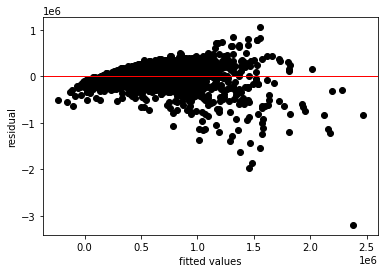

In [ ]:
# Creating the residuals by substracting the test value from the predicted 
# value for each row in the test dataset

residuals = np.subtract(y_pred, y_test)

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Data shows some heterosckedascticity. Will be tested using Barlett's test to confirm.

In [ ]:
#assessing heteroscedasticity using Barlett's test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)


# If the pvalue is less than the significance level of 0.05, then the null
# hypothesis is rejected - the variance is different for at least one pair of datapoints

# Otherwise the null hypothesis that 
# the variance is homogeneous across the data

#using significance level of 0.05:
if (p_value < 0.05 ):
  print('the variance is different for at least one pair of datapoints')
else:
  print('the variances are homogeneous across the data')

the variance is different for at least one pair of datapoints


#### Challenging the solution

In [ ]:
#RMSE of reference from initial model
rmse_linear

197394.7740007367

In [ ]:
#k-fold cross validation
#challenging the initial solution with k-fold cross validation to see if model with lower RMSE can
# be obtained. 

folds = KFold(n_splits=10)


print(str(folds.get_n_splits(X)) + ' folds are being used')

# create and assess 10 models based on the folds .
RMSES = [] # to keep track of the RSME of each model
count = 1  #count of training model

for train_index, test_index in folds.split(X):
    print('\nTraining model ' + str(count))

    # set up the train and test based on the split determined by KFold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #instance of linear regression
    linear = LinearRegression()
    linear.fit(X_train, y_train)

    #predicting
    y_pred =linear.predict(X_test)


    #rmse/evaluating
    from sklearn import metrics
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSES.append(rmse)
    print(f'RMSE: {rmse}')
    count+=1

import_rmses.append(['lowest 10-fold crossval linear rmse: ', np.min(RMSES)])

print(f'\nMinimum RMSE: {np.min(RMSES)}')

10 folds are being used

Training model 1
RMSE: 209975.92770940447

Training model 2
RMSE: 219095.9083134245

Training model 3
RMSE: 190359.14333637134

Training model 4
RMSE: 225057.7101066964

Training model 5
RMSE: 188038.0900855761

Training model 6
RMSE: 191662.07321331938

Training model 7
RMSE: 188492.09979388936

Training model 8
RMSE: 194136.950752781

Training model 9
RMSE: 201324.80750253826

Training model 10
RMSE: 212563.8790815933

Minimum RMSE: 188038.0900855761


Model identified (5) with lowest RMSE of 188038.09, which is less than the initial linear RMSE of 197394.77, and therefore a better model than the one initially found.

### II. Lasso Regression

Introduces penalty (on sum of absolute values of the coefficients) that shrinks coefficients and introduces more bias in the model in order to reduce the variance of the model (helps in addressing the issue of overfitting).

It can be used in feature selection because it can shrink the value of a coefficient to zero, but a drawback is that in cases of multicollinearity it randomly selects which variable to keep which may not be good as it may drop a column considered more useful for interpretation . Also, it cannot select more predictors than observations present, even if all predictors are relevant.

Building models using lasso regression to predict the price of a house given our predictor variables.

#### First model

In [ ]:
#NB
#Two columns showing very high multicollinearity were already dropped in preparing target and feature variables
#section. Those with VIF of infinity identified earlier were sqft_basement, sqft_above, 
# and sqft_living. Two of these (sqft basement and sqft_above) were dropped because the sum 
#of these two give sqft_living values. VIF of sqft_living dropped from infinity to 5.07 after removing the two,
#and all remaining predictor variables therefore had vif < 10

In [ ]:
# Splitting test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:
#finding best hyperparameter (penalty) value for lasso
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = Lasso()
#finding alpha value
search = GridSearchCV(estimator=lasso,param_grid=parameters,scoring='r2')
mod = search.fit(X_train,y_train)
print(mod.best_params_)
#alpha value of 0.1 identified.

{'alpha': 0.1}


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

#predicting on unseen data
y_pred = lasso.predict(X_test)

#checking rmse
rmse_lasso = np.sqrt(mean_squared_error(y_test,y_pred))
import_rmses.append(['initial lasso rmse: ', rmse_lasso])
rmse_lasso
#rmse of initial lasso model - 197394.76

197394.76189535114

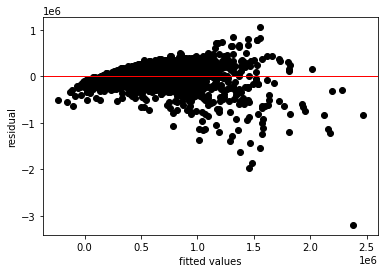

In [ ]:
# Creating the residuals by substracting the test value from the predicted 
# value for each row in the test dataset

residuals = np.subtract(y_pred, y_test)

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Data shows some heterosckedascticity. Will be tested using Barlett's test to confirm.

In [ ]:
#assessing heteroscedasticity using Barlett's test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)


# If the pvalue is less than the significance level of 0.05, then the null
# hypothesis is rejected - the variance is different for at least one pair of datapoints

# Otherwise the null hypothesis that 
# the variance is homogeneous across the data

#using significance level of 0.05:
if (p_value < 0.05 ):
  print('the variance is different for at least one pair of datapoints')
else:
  print('the variances are homogeneous across the data')

the variance is different for at least one pair of datapoints


#### Challenging the solution

In [ ]:
#k-fold cross validation
#challenging the initial solution with k-fold cross validation to see if model with lower RMSE can
# be obtained. 

folds = KFold(n_splits=10)


print(str(folds.get_n_splits(X)) + ' folds are being used')

# create and assess 10 models based on the folds .
RMSES = [] # to keep track of the RSME of each model
count = 1  #count of training model

for train_index, test_index in folds.split(X):
    print('\nTraining model ' + str(count))

    # set up the train and test based on the split determined by KFold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #fitting lasso model

    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train,y_train)

    #predicting on unseen data
    y_pred = lasso.predict(X_test)

    #rmse/evaluating
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSES.append(rmse)
    print(f'RMSE: {rmse}')
    count+=1

import_rmses.append(['lowest 10-fold crossval lasso rmse: ', np.min(RMSES)])
print(f'\nMinimum RMSE: {np.min(RMSES)}')

10 folds are being used

Training model 1
RMSE: 209975.94126223944

Training model 2
RMSE: 219095.92910945072

Training model 3
RMSE: 190359.12676181292

Training model 4
RMSE: 225057.75770055252

Training model 5
RMSE: 188038.0765218684

Training model 6
RMSE: 191662.05470148398

Training model 7
RMSE: 188492.07470880463

Training model 8
RMSE: 194136.95983148395

Training model 9
RMSE: 201324.78331233037

Training model 10
RMSE: 212563.87941033675

Minimum RMSE: 188038.0765218684


Model identified (5) with lowest RMSE of 188038.08, which is less than the initial lasso RMSE of 197394.76, and therefore a better model than the lasso model initially found. Additionally, with an rmse of 188038.08 it is now the model with lowest identified RMSE, slighty beating the the linear 10-fold cross validation model 5 (188038.09).

### III. Ridge Regression

Introduces penalty (on sum of squares of the coefficients) that shrinks coefficients and introduces more bias in the model in order to reduce the variance of the model (helps in addressing the issue of overfitting).

Unlike Lasso, it cant shrink the value of a coefficient to zero to completely eliminate features. It helps in cases of high dimensionality, and can select more relevant predictors than observations if necessary. 

Building models using ridge regression to predict the price of a house given our predictor variables.

#### First model

In [ ]:
#NB
#Two columns showing very high multicollinearity were already dropped in preparing target and feature variables
#section. Those with VIF of infinity identified earlier were sqft_basement, sqft_above, 
# and sqft_living. Two of these (sqft basement and sqft_above) were dropped because the sum 
#of these two give sqft_living values. VIF of sqft_living dropped from infinity to 5.07 after removing the two,
#and all remaining predictor variables therefore had vif < 10

In [ ]:
# Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:
#ridge regression
#finding best alpha value. using all features
ridge = Ridge()
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',refit=True,cv=10)
mod = search.fit(X_train,y_train)
print(mod.best_params_)

{'alpha': 10.0}


In [ ]:
#fitting ridge model with aplha value
ridge = Ridge(alpha=10.0)
ridge.fit(X_train,y_train)

#predicting on unseen data
y_pred = ridge.predict(X_test)

#checking rmse
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred))
import_rmses.append(['initial ridge rmse: ', rmse_ridge])
rmse_ridge
#The rmse is 197388.64

197388.6425585275

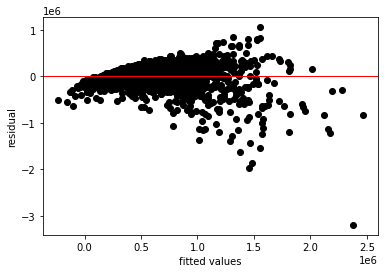

In [ ]:
# Creating the residuals by substracting the test value from the predicted 
# value for each row in the test dataset

residuals = np.subtract(y_pred, y_test)

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Data shows some heterosckedascticity. Will be tested using Barlett's test to confirm.

In [ ]:
#assessing heteroscedasticity using Barlett's test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)


# If the pvalue is less than the significance level of 0.05, then the null
# hypothesis is rejected - the variance is different for at least one pair of datapoints

# Otherwise the null hypothesis that 
# the variance is homogeneous across the data

#using significance level of 0.05:
if (p_value < 0.05 ):
  print('the variance is different for at least one pair of datapoints')
else:
  print('the variances are homogeneous across the data')

the variance is different for at least one pair of datapoints


#### Challenging the solution

In [ ]:
#k-fold cross validation
#challenging the initial solution with k-fold cross validation to see if model with lower RMSE can
# be obtained. 

folds = KFold(n_splits=10)


print(str(folds.get_n_splits(X)) + ' folds are being used')

# create and assess 10 models based on the folds .
RMSES = [] # to keep track of the RSME of each model
count = 1  #count of training model

for train_index, test_index in folds.split(X):
    print('\nTraining model ' + str(count))

    # set up the train and test based on the split determined by KFold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #fitting ridge model 
    ridge = Ridge(alpha=10.0)
    ridge.fit(X_train,y_train)

    #predicting on unseen data
    y_pred = ridge.predict(X_test)

    #rmse/evaluating
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSES.append(rmse)
    print(f'RMSE: {rmse}')
    count+=1

import_rmses.append(['lowest 10-fold crossval ridge rmse: ', np.min(RMSES)])

print(f'\nMinimum RMSE: {np.min(RMSES)}')

10 folds are being used

Training model 1
RMSE: 209970.31071075433

Training model 2
RMSE: 219116.9944568469

Training model 3
RMSE: 190353.99440753323

Training model 4
RMSE: 225083.9687645166

Training model 5
RMSE: 188026.8595011358

Training model 6
RMSE: 191643.07111490518

Training model 7
RMSE: 188472.41788084994

Training model 8
RMSE: 194122.05620715354

Training model 9
RMSE: 201319.63976495346

Training model 10
RMSE: 212570.89069197924

Minimum RMSE: 188026.8595011358


Model identified (5) with lowest RMSE of 188026.86, which is less than the initial ridge RMSE of 197388.64, and therefore a better model than the ridge model initially found. Additionally, with an rmse of 188026.86 it is now the model with lowest identified RMSE so far, beating the lasso 10-fold cross validation model 5 (188038.08).

### IV. Elastic Net Regression

It is a hybrid version of lasso and ridge regression. It applies a penalty to the sum of absoulte values of coefficients as well as to the sum of squares of coefficients. Helps in overcoming lasso's problem of  not being able to select more predictors than observations and random dropping of one of correlated predictors even if it may be informative, as well as ridge's drawback of not being able to eliminate irrelevant  features alone. However, it has high computational costs, and can suffer from double shrinkage, which leads to increased bias and poor predictions. 

Building models using elastc net regression to predict the price of a house given our predictor variables.

#### First Model

In [ ]:
#NB
#Two columns showing very high multicollinearity were already dropped in preparing target and feature variables
#section. Those with VIF of infinity identified earlier were sqft_basement, sqft_above, 
# and sqft_living. Two of these (sqft basement and sqft_above) were dropped because the sum 
#of these two give sqft_living values. VIF of sqft_living dropped from infinity to 5.07 after removing the two,
#and all remaining predictor variables therefore had vif < 10

In [ ]:
# Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:
#finding best hyperparameter values - alpha and l1_ratio
elastic=ElasticNet()
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(X_train,y_train)
print(search.best_params_)

{'alpha': 0.01, 'l1_ratio': 0.8}


In [ ]:
#fitting model
elastic=ElasticNet(alpha=0.01,l1_ratio=0.8)
elastic.fit(X_train,y_train)

#predicting on unseen data
y_pred = elastic.predict(X_test)

#checking rmse
rmse_elastic = np.sqrt(mean_squared_error(y_test,y_pred))

import_rmses.append(['initial elastic net rmse: ', rmse_elastic])
print('elastic ', rmse_elastic)

elastic  197374.5482763296


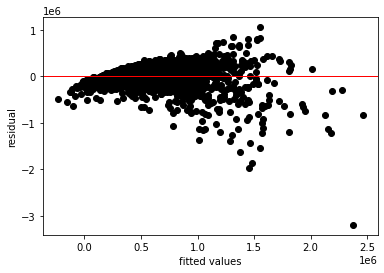

In [ ]:
# Creating the residuals by substracting the test value from the predicted 
# value for each row in the test dataset

residuals = np.subtract(y_pred, y_test)

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Data shows some heterosckedascticity. Will be tested using Barlett's test to confirm.

In [ ]:
#assessing heteroscedasticity using Barlett's test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)


# If the pvalue is less than the significance level of 0.05, then the null
# hypothesis is rejected - the variance is different for at least one pair of datapoints

# Otherwise the null hypothesis that 
# the variance is homogeneous across the data

#using significance level of 0.05:
if (p_value < 0.05 ):
  print('the variance is different for at least one pair of datapoints')
else:
  print('the variances are homogeneous across the data')

the variance is different for at least one pair of datapoints


#### Challenging the solution

In [ ]:
#k-fold cross validation
#challenging the initial solution with k-fold cross validation to see if model with lower RMSE can
# be obtained. 

folds = KFold(n_splits=10)


print(str(folds.get_n_splits(X)) + ' folds are being used')

# create and assess 10 models based on the folds .
RMSES = [] # to keep track of the RSME of each model
count = 1  #count of training model

for train_index, test_index in folds.split(X):
    print('\nTraining model ' + str(count))

    # set up the train and test based on the split determined by KFold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #fitting elastic net model 
    elastic=ElasticNet(alpha=0.01,l1_ratio=0.8)
    elastic.fit(X_train,y_train)

    #predicting on unseen data
    y_pred = elastic.predict(X_test)


    #rmse/evaluating
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSES.append(rmse)
    print(f'RMSE: {rmse}')
    count+=1

import_rmses.append(['lowest 10-fold crossval elastic net rmse: ', np.min(RMSES)])

print(f'\nMinimum RMSE: {np.min(RMSES)}')

10 folds are being used

Training model 1
RMSE: 209955.10923451316

Training model 2
RMSE: 219178.214130843

Training model 3
RMSE: 190340.03300966925

Training model 4
RMSE: 225160.00090193283

Training model 5
RMSE: 187995.50613440672

Training model 6
RMSE: 191589.54482454754

Training model 7
RMSE: 188417.04231665665

Training model 8
RMSE: 194080.38097940705

Training model 9
RMSE: 201305.67119386536

Training model 10
RMSE: 212591.71578231582

Minimum RMSE: 187995.50613440672


In [ ]:
rmse_elastic

197374.5482763296

Model identified (5) with lowest RMSE of 187995.51, which is less than the initial elastic net RMSE of 197374.55, and therefore a better model than the elastic model initially found. Additionally, with an rmse of 187995.51 it is now the predictive model (predicting conditional mean of price) with lowest identified RMSE so far, beating the ridge 10-fold cross validation model 5 (188026.86).

### Examining coefficient trends (mean)

linear, lasso, ridge and elastic net regression estimate the mean of price. Examining the general trends in the coefficients.

In [ ]:
#comparing trends coefficients using the first (initial) models for linear, lasso, ridge and
#elastic net regression
df_coef = pd.DataFrame(regression.coef_, columns=['linear'], index=x_cols)
df_coef['linear rank +ve'] = df_coef['linear'].rank(ascending=False)
df_coef['lasso'] = lasso.coef_
df_coef['lasso rank'] = df_coef['lasso'].rank(ascending=False)
df_coef['ridge'] = ridge.coef_
df_coef['ridge rank'] = df_coef['ridge'].rank(ascending=False)
df_coef['elastic'] = elastic.coef_
df_coef['elastic rank'] = df_coef['elastic'].rank(ascending=False)
#narrowing down to top 5 factors with a positive relationship to home price - an increase in the factor
#causes an increase in price 
df_coef.sort_values(by=['linear'], ascending=False).head()

,linear,linear rank +ve,lasso,lasso rank,ridge,ridge rank,elastic,elastic rank
sqft_living,160571.958719,1.0,155745.869208,1.0,155471.561144,1.0,154688.063208,1.0
grade,113853.619090,2.0,109690.002545,2.0,109636.374405,2.0,109481.198128,2.0
lat,83254.357948,3.0,79570.016356,3.0,79541.088624,3.0,79457.400863,3.0
waterfront,52413.680474,4.0,49460.578270,4.0,49445.564470,4.0,49401.934403,4.0
view,40117.834495,5.0,38255.107010,5.0,38268.445503,5.0,38306.754542,5.0


As per our data, looking at the top five factors affecting an increase in the conditional mean of price, it appears that the square footage of the interior living space takes the lead, having the biggest effect on price increase upon an increase in its value. It is followed by the grade (of building construction and design), then latitude, whether the property is waterfront or not and finally view (the rating of the view of the property).

In [ ]:
#summary of important rmses from the 4 typrs of regression (multilinear, lasso, ridge, elastic net)
import_rmses

[['initial linear rmse: ', 197394.7740007367],
 ['lowest 10-fold crossval linear rmse: ', 188038.0900855761],
 ['initial lasso rmse: ', 197394.76189535114],
 ['lowest 10-fold crossval lasso rmse: ', 188038.0765218684],
 ['initial ridge rmse: ', 197388.6425585275],
 ['lowest 10-fold crossval ridge rmse: ', 188026.8595011358],
 ['initial elastic net rmse: ', 197374.5482763296],
 ['lowest 10-fold crossval elastic net rmse: ', 187995.50613440672]]

Lowest RMSE from multilinear, lasso, ridge and elastic net models belongs to model 5 in elastic net 10-fold cross-validation: 187995.51

### V. Quantile Regression

It is an extension of linear regression, useful when there is heteroscedasticity and skewness in the data. Whereas linear regression estimates the  mean of y (target), quantile regression estimates a particular quantile (percentile), such as the different quartiles or any other percentiles.


Using quantile regression to investigate the effects of the factors on house prices at different quantiles (by investigating the coefficient trends).

In [ ]:
#NB
#Two columns showing very high multicollinearity were already dropped in preparing target and feature variables
#section. Those with VIF of infinity identified earlier were sqft_basement, sqft_above, 
# and sqft_living. Two of these (sqft basement and sqft_above) were dropped because the sum 
#of these two give sqft_living values. VIF of sqft_living dropped from infinity to 5.07 after removing the two,
#and all remaining predictor variables therefore had vif < 10

In [ ]:
#creating columns that will be in dataframe passed into the quantile regression object. the dataframe will have
#both the scaled feature columns and price column
scaled_cols = x_cols.copy().to_list()

scaled_cols.append('price')
scaled_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

In [ ]:
#creating datafram with scaled feature columns and the price column
scaled_feat = pd.DataFrame(X).merge(pd.DataFrame(y), left_index=True, right_index=True)
scaled_feat.columns = scaled_cols

In [ ]:
#will contain the coefficients of the different quantiles
param_arr = []

In [ ]:
#list of our quantiles of interest - Q1, Q2 (median), and Q3 of price
quant = [.25,.5,.75]
# looping through the different quantiles, creating a model for each and printing out a summary of each model
for x in quant:
  print(f'\nQUANTILE: {x}')
  mod = smf.quantreg(f"price ~ {' + '.join(scaled_cols[0:-1])}", scaled_feat)
  fit_mod = mod.fit(q=x)

  # Then print out the summary of our model
  #
  print(fit_mod.summary())
  print('**********************************************************************************')

  param_arr.append([x, fit_mod.params[scaled_cols[0:-1]]])


QUANTILE: 0.25
                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4245
Model:                       QuantReg   Bandwidth:                   1.698e+04
Method:                 Least Squares   Sparsity:                    2.929e+05
Date:                Fri, 10 Jun 2022   No. Observations:                21612
Time:                        11:44:44   Df Residuals:                    21595
                                        Df Model:                           16
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.316e+05    862.907    500.143      0.000     4.3e+05    4.33e+05
bedrooms      -1.333e+04   1117.723    -11.930      0.000   -1.55e+04   -1.11e+04
bathrooms      2.206e+04   1565.344     14.094      0.000     1.9e+04    2.51e+04
sqft_living    7.076e

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4744
Model:                       QuantReg   Bandwidth:                   1.946e+04
Method:                 Least Squares   Sparsity:                    2.630e+05
Date:                Fri, 10 Jun 2022   No. Observations:                21612
Time:                        11:44:49   Df Residuals:                    21595
                                        Df Model:                           16
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.127e+05    894.424    573.174      0.000    5.11e+05    5.14e+05
bedrooms      -1.942e+04   1168.900    -16.611      0.000   -2.17e+04   -1.71e+04
bathrooms      2.235e+04   1620.280     13.791      0.000    1.92e+04    2.55e+04
sqft_living    9.229e+04   2013.548  

Of interest is the coefficient trends at the different quantiles.

In [ ]:
df_coefs = pd.DataFrame(param_arr[0][1]).merge(pd.DataFrame(param_arr[1][1]), left_index=True, right_index=True).merge(pd.DataFrame(param_arr[2][1]), left_index=True, right_index=True)
df_coefs.columns = [0.25, 0.5, 0.75]

df_coefs['0.25 rank'] = df_coefs[0.25].rank(ascending=False)
df_coefs['0.50 rank'] = df_coefs[0.50].rank(ascending=False)
df_coefs['0.75 rank'] = df_coefs[0.75].rank(ascending=False)
#narrowing down to identify top 5 factors with a positive relationship to home price - an increase in the factor
#causes an increase in price - at different quartiles
df_coefs.sort_values(by=['0.25 rank']).head(8)

,0.25,0.5,0.75,0.25 rank,0.50 rank,0.75 rank
grade,84490.380689,93982.560274,101955.343135,1.0,1.0,2.0
sqft_living,70757.540710,92292.445271,129675.452156,2.0,2.0,1.0
lat,64293.134233,76187.904271,87119.589128,3.0,3.0,3.0
view,26458.556077,38923.283880,47782.339977,4.0,5.0,5.0
sqft_living15,24465.211377,25550.936322,24970.050720,5.0,6.0,6.0
waterfront,23587.931329,40091.237720,74957.004624,6.0,4.0,4.0
bathrooms,22062.233557,22345.232343,21416.880163,7.0,7.0,7.0
condition,15651.878944,16895.808847,15903.649007,8.0,9.0,8.0


It can be observed from the rankings that the top 5 factor ranks are not identical across the different quartiles

Q1 (quantile 0.25):
* Top 5 factors affecting increase in the first quartile of price (~ at low levels of price) in order: grade, sqft_living, lat, view, sqft_living15.
* The grade (of building construction and design) takes the lead, it is followed by the square footage of the interior living space, then latitude, the view rating, and finally the square footage of interior housing living space for the nearest 15 neighbors

Q2 (quantile 0.50):
* Top 5 factors affecting increase in the second quartile of price (~ at median levels of price) in order: grade, sqft_living, lat, waterfront, and view.
* The grade (of building construction and design) takes the lead, it is followed by the square footage of the interior living space, then latitude, whether the property is waterfront or not and finally the view rating.

Q3 (quantile 0.75):
* Top 5 factors affecting increase in the third quartile of price (~ at high levels of price) in order: sqft_living, grade, lat, waterfront, and view.
*The square footage of the interior living space takes the lead, it is followed by the The grade (of building construction and design), then latitude, whether the property is waterfront or not and finally the view rating.

## Conclusions and Recommendations

### Conclusion

The dataset was loaded, and cleaned, and univariate and bivariate analysis carried out providing valuable insights on the target and feature variables. Multivariate analysis and modelling were then carried out. Therefore the major objectives were achieved: studying the factors that affect housing prices using the given information on real estate properties, and creating a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.



> **Some univariate analysis results:**
* Most price values of houses fell within the range of 75000.0 to 837500
* Most houses were not overlooking the waterfront.
* The top 5 most common zipcodes were 98103, 98038, 98115, 98052 and 98117.
* The most common rating of condition of the house was 3.
* The most common grade (level of construction and design) was 7, which is a more average level on the scale of 1-13.
* Most houses had 3 bedrooms.
* Most houses had two and a half baths.
* Most houses had 1 floor.
* Most houses had an interior square footage living space within the range of 1615.0 to 2940.0.
* Most houses had lot sizes ranging from 520.0 to 165603.9 square feet.
* Most houses were built between 2003 and 2015. etc.

> **Some bivariate analysis results**:

> The average price of houses was highest for:
* waterfront: Houses that overlook the waterfront
* zipcodes: Houses in zipcode 98039
* condition: Houses whose condition rating was 5
* grade: Houses whose grade of quality of construction and design at 13
* bedrooms: Houses with 8 bedrooms
* bathrooms: Houses with 7.75 baths
* floors: Houses with 2.5 baths
* view: Houses with a rating of 4 for views etc.

> **Multivariate analysis and Modelling:**

**Multicollinearity** was checked using variance inflation factor:
* A VIF of infinity was identified for sqft_basement, sqft_above, and sqft_living. Two of these (sqft basement and sqft_above) were dropped because the sum of these two give sqft_living values. VIF of sqft_living dropped from infinity to 5.07 after removing the two, and all remaining predictor variables therefore had vif < 10.

**Target and feature** (excluding sqft basement and sqft_above as explained above) **variables** were then **created** for use in modelling.

**Modelling**

**1. Multilinear regression.**

The initial linear rmse was found to be 197394.77. Upon cross validation , a model with a lower rmse of 188038.09, hence a better model, was identified. 

**2. Lasso regression.**

A grid search was run and the best alpha hyperparameter value was determined to be 0.1. The initial lasso model had a rmse of 197388.64. Upon cross validation , a lasso model with a lower rmse of 188038.08, hence a better model, was identified (which is also slightly lower than the best linear model rmse - 188038.09).

**3. Ridge Regression.**

A grid search was run and the best alpha hyperparameter value was determined to be 10. The initial ridge model had a rmse of 197394.76. Upon cross validation , a ridge model with a lower rmse of 188026.86, hence a better model, was identified. This model's rmse is also lower than the best lasso model rmse - 188038.08).

**4. Elastic Net Regression.**

A grid search was run and the best alpha hyperparameter value was determined to be 0.01 while the best l1 ratio value was determined to be 0.8. The initial elastic net model had a rmse of 197374.5. Upon cross validation, a model with a lower rmse of 187995.51, hence a better elastic net model, was identified. This model's rmse is also lower than the best ridge model rmse - 188026.86).

**From the above four types of regression**, the model with the best predictive power (lowest root mean squared error value) was identified to be an elastic net model (model 5 in cross validation) with an RMSE of 187995.51.

Additionally, upon **examining the coefficients** of these models, the top 5 factors affecting an increase in the conditional mean of price upon an increase in their values were:
* The square footage of the interior living space taking the lead, having the biggest effect on price increase upon an increase in its value. 
* The grade (of building construction and design)
* Latitude
* Whether the property is waterfront 
* The view (the rating of the view of the property).

**5. Quantile Regression.**

Quantile regression was used to create models that would aid in investigating the effects of the factors on house prices at different quantiles (by investigating the coefficient trends). Linear regression predicts the conditional mean of the target(prices), but the variable effects at different levels of the distribution may be different.

* At the conditional Q1 (quantile .25) of price (corresponds to low levels of price), the factor that most affected an increase in price with an increase in its value was determined to be the grade of building construction and design. This top factor was the same for Q2 (quantile 0.5) of price (corresponding to median values of price). For Q3 (quantile .75) of price (corresponding to high values of price), the factor that most affected an increase in price with an increase in its value was determined to be the square footage of the interior living space.


### Recommendations

> Based on the analysis, we would recommend using the elastic net model that had a root mean squared error of 187995.51 for predicting the price of a house given the features we had (excluding sqft_above and sqft_basement, because these were dropped before modelling due to very high multicollinearity). This model was model 5 in elastic net cross validation. Out of all the models tested, it was the one with the best predictive power (lowest root mean squared error).

> Additionally, upon examining the coefficients, the top five factors affecting the magnitude of increase in the mean of price with an increase in their values were narrowed down to (in order of influence): the square footage of the interior living space, the grade (quality of building construction and design), latitude, whether the property is waterfront or not and the rating of the view of the property. Based on this, we recommend that:
* Property developers prioritise the location and quality of construction and design as well as reasonable interior living space if they want to build high value properties.
* Those selling their houses should consider upgrading the quality of construction and design to increase the sale value of their property.
* For those hoping to purchase homes at lower price ranges, they should avoid properties that have a lot of square footage of interior living space, are at the waterfront, with very good views, and at particular locations that are generally expensive.
